In [1]:
%load_ext autoreload
%autoreload 2

import os, sys, random
path, _ = os.path.split(os.getcwd())
sys.path.append(path)

# Showdown c51 v1 vs a2c v1

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pymongo import MongoClient
from pandas.io.json import json_normalize

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [3]:
conn = MongoClient()["stats"]["c51_a2c_cap20"]

In [5]:
df = pd.DataFrame.from_records(json_normalize(conn.find()))

In [6]:
df = df.set_index('created_at')
df.robot_goal = df.robot_goal.astype(int)
df.opponent_goal = df.opponent_goal.astype(int)
df.robot_win = df.robot_win.astype(int)
df.opponent_win = df.opponent_win.astype(int)

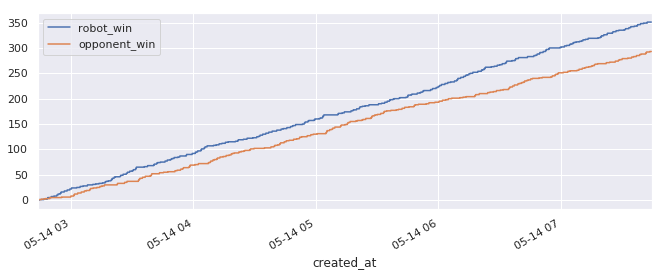

In [7]:
# Cumulative wins
ts = pd.DataFrame()
ts["robot_win"] = df["robot_win"]
ts["opponent_win"] = df["opponent_win"]
ts.cumsum().plot()

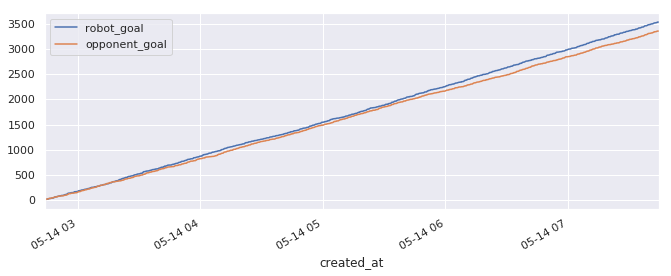

In [8]:
# Scores
ts = pd.DataFrame()
ts["robot_goal"] = df["robot_goal"]
ts["opponent_goal"] = df["opponent_goal"]
ts.cumsum().plot()